In [18]:
import pandas as pd
import numpy as np

#MATPLOT :-)
import matplotlib.pyplot as plt

#this is so it looks nice when we format it
#from IPython.display import display

#load dataset
df = pd.read_csv('aviation-accident.csv')

# Drop the existing index column
df.reset_index(drop=True, inplace=True)


df.tail()


,date,type,registration,operator,fatalities,location,country,cat,year
23912,16-FEB-2023,Cessna 208 Cargomaster,CX-MAX,AeromÃ¡s,0,"near Berisso, BA",Argentina,A1,2023
23913,17-FEB-2023,Honda HA-420 HondaJet,N14QB,Haedo Air LLC,0,Houston-William ...,USA,A2,2023
23914,22-FEB-2023,Beech B200 Super King Air,N55PC,CTEH,5,near Little Rock-Bill...,USA,A1,2023
23915,28-FEB-2023,Cessna 208B Grand Caravan,C-GMVB,ZAM Air Service,2,"near Nakina, ON",Canada,A1,2023
23916,01-APR-2023,Cessna 750 Citation X,N85AV,Bank of Utah Trustee,0,Belmar/Farmingda...,USA,A2,2023


In [19]:
#to get the shape of our DF (n_rows, n_columns)

print("this is the shape of our DF (n_rows, n_columns)",df.shape)

this is the shape of our DF (n_rows, n_columns) (23917, 9)


In [20]:

#The different types of columns and the types we have are the following
df.columns


Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year'],
      dtype='object')

In [21]:
#in our data we have missing dates, to make it all linear we shall change all missing values to NaN
#change unknown 'date' - date unk. to NaN

replace_date = {'date': ['date unk.']}
df.replace(replace_date, np.nan, inplace=True)

#change unknown 'country' - Unknown country . to NaN
replace_country = {'country': ['Unknown country']}
df.replace(replace_country, np.nan, inplace = True)

#display a randomm piece of data to make sure our DF still looks good
display(df.sample())

#data is all formatted and we can start work on stats in relation to our data

,date,type,registration,operator,fatalities,location,country,cat,year
4000,24-JUL-1945,Douglas Dakota IV (DC-3),KN530,RAF,NaN,near Tacloban,Philippines,A1,1945


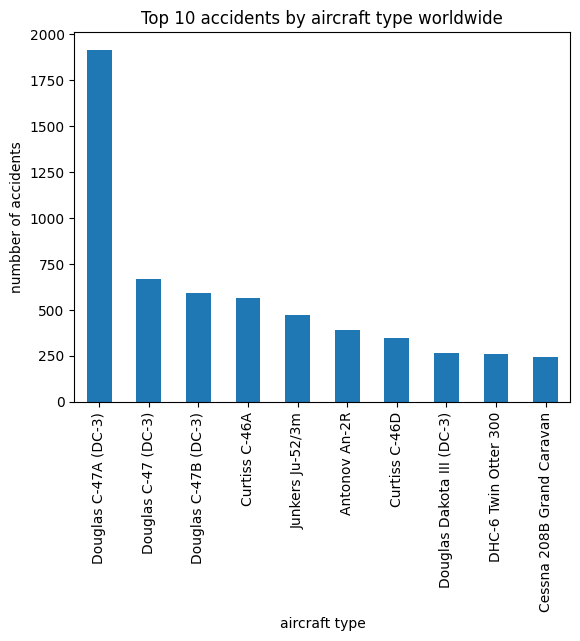

In [22]:
#Lets bring MATPLOTLIB

#we want to get the top 10 number of accidents by plane
top_10 = df['type'].value_counts().nlargest(10)


top_10.plot(kind='bar')
plt.title('Top 10 accidents by aircraft type worldwide')
plt.xlabel('aircraft type')
plt.ylabel('numbber of accidents')
plt.show()

In [23]:
# Filter the DataFrame for accidents in South Africa and making it a new df 
south_africa = df[df['country'] == 'South Africa'].copy()
zimbabwe = df[df['country'] == 'Zimbabwe'].copy()

# Group the filtered data by aircraft type and count the number of occurrences
south_africa['type'].value_counts()




type
Douglas C-47B (DC-3)           11
Douglas C-47A (DC-3)            8
Lockheed 18 Lodestar            5
Hawker Siddeley HS-125-400B     4
Cessna 208 Caravan I            4
                               ..
Learjet 35A                     1
Bombardier Global 6000          1
Airbus A350-941                 1
Beech B200 King Air             1
Dassault Falcon 2000            1
Name: count, Length: 78, dtype: int64

In [24]:
south_africa['fatalities'] = pd.to_numeric(south_africa['fatalities'], errors='coerce')

#incident with highest fatalities
print (south_africa.loc[south_africa['fatalities'].idxmax()])

#average number of accidents in South Africa
south_africa['fatalities'].mean()

date                      19-OCT-1986
type                Tupolev Tu-134A-3
registration                   C9-CAA
operator        Mozambique Government
fatalities                       34.0
location             near Komatipoort
country                  South Africa
cat                                A1
year                             1986
Name: 15719, dtype: object


np.float64(2.418181818181818)

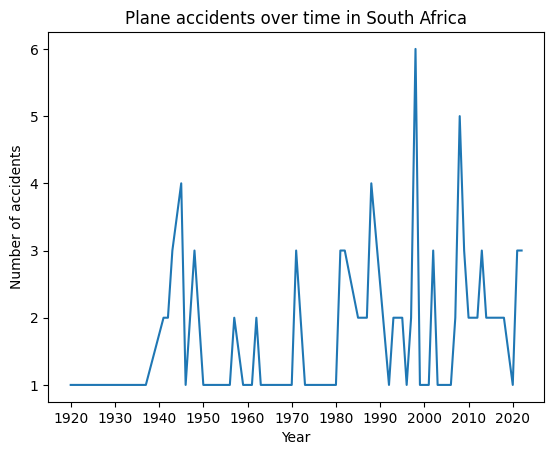

In [25]:
#lets create a line plot for the frequency of crashes in South Africa
south_africa['date'] = pd.to_datetime(south_africa['date'], format='%d-%b-%Y', errors='coerce')

SA_accidents_yearly = south_africa.groupby(south_africa['date'].dt.year).size()

plt.plot(SA_accidents_yearly.index,SA_accidents_yearly.values)
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Plane accidents over time in South Africa')
plt.grid(False)

#make sure that the space between years in a max of 5
custom_ticks = np.arange(min(SA_accidents_yearly.index),max(SA_accidents_yearly.index), 10)
plt.xticks(custom_ticks)
plt.show()

In [26]:
#lets compare that to argentina 

argentina = df[df['country']=='Argentina'].copy()
argentina['type'].value_counts()



type
Douglas C-47A (DC-3)                    26
Curtiss C-46A                           10
Morane Saulnier (FMA) MS.760 Paris I    10
Vickers 615 Viking 1B                    9
DHC-6 Twin Otter 200                     7
                                        ..
Cessna 680 Citation Sovereign            1
Cessna 560XL Citation XLS                1
Fairchild SA227-AC Metro III             1
Cessna 501 Citation I/SP                 1
Cessna 208 Cargomaster                   1
Name: count, Length: 118, dtype: int64

In [27]:
argentina = df[df['country']=='Argentina'].copy()

#convert numeric values to str
argentina['fatalities'] = pd.to_numeric(argentina['fatalities'], errors='coerce')

#highest number of fatalities incident
print (argentina.loc[argentina['fatalities'].idxmax()])


argentina['fatalities'].mean()

date                      19-JUL-1961
type                     Douglas DC-6
registration                   LV-ADW
operator        Aerolineas Argentinas
fatalities                       67.0
location               near Pardo, BA
country                     Argentina
cat                                A1
year                             1961
Name: 9108, dtype: object


np.float64(4.613636363636363)

<function matplotlib.pyplot.show(close=None, block=None)>

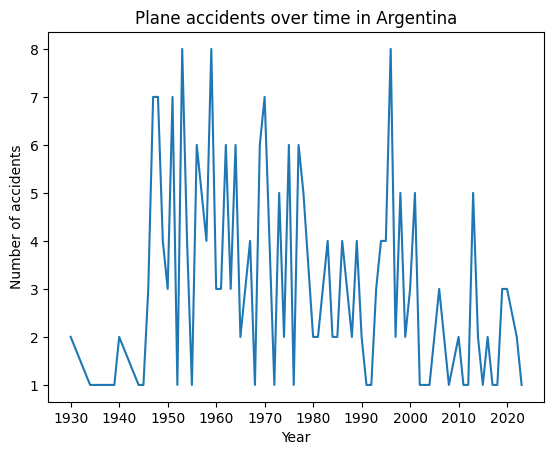

In [28]:
argentina['date'] = pd.to_datetime(argentina['date'],format= '%d-%b-%Y', errors = 'coerce')

argentina_accidents = argentina.groupby(argentina['date'].dt.year).size()

plt.plot(argentina_accidents.index,argentina_accidents.values)
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.title('Plane accidents over time in Argentina')

#make sure that the space between years in a max of 5
custom_ticks = np.arange(min(argentina_accidents.index),max(argentina_accidents.index), 10)
plt.xticks(custom_ticks)
plt.show



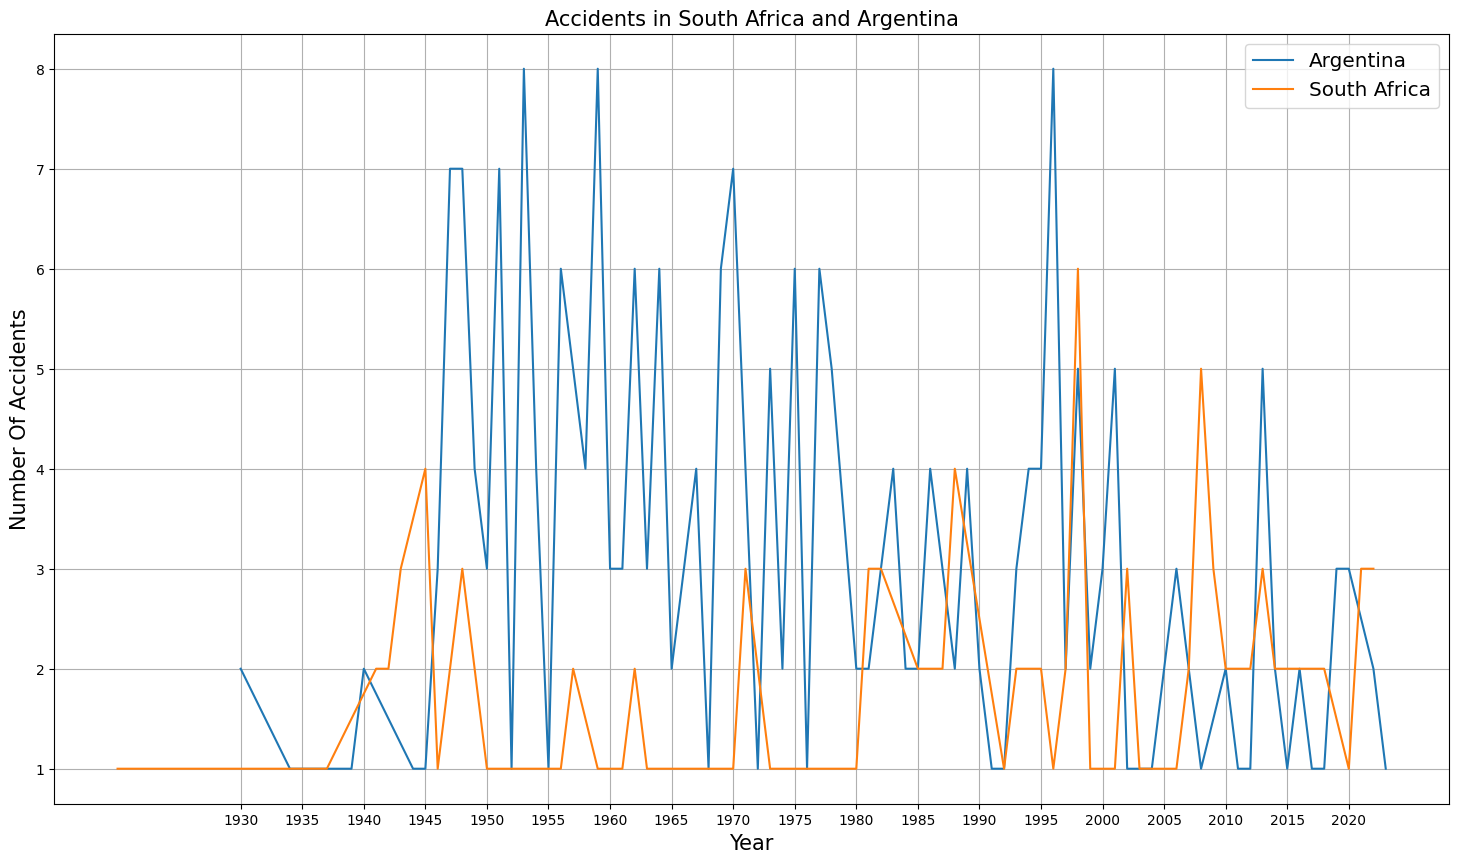

In [29]:

#lets plot the graphs together to see the change
plt.figure(figsize=(18, 10))
plt.plot(argentina_accidents.index, argentina_accidents.values, label='Argentina')
plt.plot(SA_accidents_yearly.index, SA_accidents_yearly.values, label='South Africa')
plt.legend(fontsize='x-large')
plt.title('Accidents in South Africa and Argentina', size = '15')
plt.xlabel('Year', size ='15')
plt.ylabel('Number Of Accidents', size = '15')
plt.grid(True)
custom_ticks = np.arange(min(argentina_accidents.index),max(argentina_accidents.index), 5)
plt.xticks(custom_ticks)
plt.show()


If we compare the accidents in Argentina and South Africa in the time period (1919-2023), we can see that argentina has had a higher number of overall accidents 118, compared to South Africa 78, while this may seem like a big increase, our time period is over 104 years, it means that it is an overall year-on-year increase of 0.38 accidents per year.


One intresting thing to note is the when we compare the accidents in South Africa and Argentina on one line plot graph, it is intresting to note, that most spikes in accidents are related (i.e - when there is a spike of accidents in South Africa,  there is also a similar spike in Accidents in South Africa).

When comparing fatality mean its an intresting conclusion having drawn an earlier conclusion that most spikes in accidents are related and that while the number of acciddents differ, it does not greatly so, if we are looking at it over a 104 year spread, differing by only 40 incidents. The different means are quite broad, SA having a mean of 2.4 and Argentina having a mean of 4.6 this is quite large considering the time period.

we can however draw calculated conclusions as to why that might be, one is Argentina has the Andes a high-altitude mountain range which might make flying riskier and in the event of an incident, causes rescue services to have a much harder challenge

Incidents worth noting are the 1986 crash in South Africa:

type                Tupolev Tu-134A-3
registration                   C9-CAA
operator        Mozambique Government
fatalities                       34.0
location             near Komatipoort
country                  South Africa
cat                                A1
year                             1986

And 

The 1961 crash in Argentina:

ate                      19-JUL-1961
type                     Douglas DC-6
registration                   LV-ADW
operator        Aerolineas Argentinas
fatalities                       67.0
location               near Pardo, BA
country                     Argentina
cat                                A1
year                             1961

both of these having the highest casuality rates in their respective countries history.


As a futher topic of study, I would reccomend trying to find out what caused the accidents, as then we can focus on how we can further reduce these incidents